Results for 10 degrees:
Angle in Degrees of mean complex number =  9.157576374910002
Angle in Degrees of recursive complex number =  -0.017600343877390248
mode =  ModeResult(mode=array([5], dtype=int32), count=array([5]))



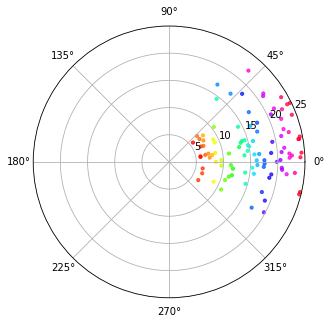

In [9]:
import os
import re
import time
import cmath

# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np
from array import *
import matplotlib.pyplot as plt
import random
import scipy.stats as warts
from scipy.stats import mode
from numpy import dtype

from IPython.display import display, clear_output
plt.rcParams['figure.figsize'] = [30, 15]

DTime = 0.005
################################################################
n = 100           # Number of readings to take (iterations).
################################################################
i = n
clear_output(wait=True)
print('..... PROCESSING .....')

array_windDirectionRadians = array('f', [])
array_windDirectionDegrees = array('i', [])
array_y = array('f', [])
array_cn1 = np.zeros(n, dtype=np.complex)
cn2 = 0+0j
###############################################################################

for x in range(n):
    i = i -1                                     # Countdown
    windSpeed =  random.uniform(5, 25)
    
    # Simulate a north easterly wind:
    degrees = 10
    variance = 20
    windDirection = int(np.random.normal(degrees,variance))       # Degrees
    if (windDirection<0):
        windDirection = windDirection + 360    # Degrees
    array_windDirectionDegrees.append(windDirection)
    #print('Wind Direction Degrees= ',windDirection)

    windDirectionRadians = windDirection*2*np.pi/360
    #print('Wind Direction Radians = ',windDirectionRadians)
    cn1 = cmath.rect(1,windDirectionRadians)
    #print('Polar to rectangular = ',cn1)
#################################################
    array_cn1[x] = cn1
    #print('array_cn1 = ',array_cn1)
    cn2 = cn1 + cn2
    a = 0.1                     # Lower value is smoother. Normaly 0.1.
    if (x > 0):
        previousCn1 = (1-a)*previousCn1 + a*cn1
    else:
        previousCn1 = 0+0j
    #print('previousCn1 = ',previousCn1)
#################################################    
    array_windDirectionRadians.append(windDirectionRadians)
    array_y.append(windSpeed)
    print('Countdown: ',i)
    time.sleep(DTime)
    clear_output(wait=True)
#print('previousCn1 = ',previousCn1)
cn2 = (cn2 - 0+0j)/n
#print('cn2 = ',cn2)
#print('Angle in Radians of complex number = ',cmath.phase(cn2))
#print()
print('Results for',degrees,'degrees:')
print('Angle in Degrees of mean complex number = ',cmath.phase(cn2)*360/(2*np.pi))
print('Angle in Degrees of recursive complex number = ',cmath.phase(previousCn1)*360/(2*np.pi))
windDirectionRadians = windDirection*2*np.pi/360
print('mode = ',warts.mode(array_windDirectionDegrees))
print()
# Set the plot size:
plt.rcParams['figure.figsize'] = [10, 5]

# Make the plots:
r = array_y
theta = array_windDirectionRadians
#print('theta = ',theta)
#print('r = ',r)

area = 10
colors = r

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)
ax.set_rmax(25)
plt.show()